## Sentiment Analysis from Facebook.

Official Cuban Media posted in Facebook a sort of poll about the acceptance of a TV space from a Cuban journalist. 

Although people should evaluate the journalist's TV space rating it from 1 (negative) to 10 (positive), opinions and reviews observed in the comments had a qualitative nature rather than a value from 1 to 10 that would have made our work easier.

Comments were then extracted using GRAPH API through FacePager Software (all content is public and according to Facebook privacy rules).

Data was pre-processed in Excel. We added a 'review' column that classifies comments in 'negative' or 'positive'.

We observed there was a frequency of keywords that were present in negative comments and not so frequent in positive ones. The other way around occured the same, people who wrote positive reviews about the journalist used keywords that were hard to find in negative reviews.

We use the the following formula in Excel to classify comments in negative or positive: =IF(SUM(COUNTIF(B2,{"*keyword_1*","*keyword_2*"...})),"neg","pos"). Keywords were added until there was no significant changes in the proportion bewtween negatives and positives reviews.

We would like to apply ML algorithms to check if the criteria follwed to classify those Facebook comments was accurate and predict the nature of future comments.

Since it is a Cuban poll, extracted comments are in Spanish language. So the examples we will use to test our predictions will be in Spanish as well. Of course we will translate the exemples for our readers have proof of the accuracy of the algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('comments.csv', encoding='latin-1')

In [3]:
df.head(20)

,Date_created,Comment,review
0,2021-03-09 20:45,Cero000000. .periodista pésimo y títere de car...,neg
1,2021-03-09 20:45,Diez.,pos
2,2021-03-09 20:46,Diez,pos
3,2021-03-09 20:46,Cero,neg
4,2021-03-09 20:47,Diez,pos
5,2021-03-09 20:48,Debe tener sus modificaciones pero es necesaria.,pos
6,2021-03-09 20:48,Diez,pos
7,2021-03-09 20:50,Pésima,neg
8,2021-03-09 20:50,Se pude dar cero En serio ???????,neg
9,2021-03-09 20:50,Cero,neg


In [4]:
df.shape

(6773, 3)

In [5]:
df.isnull().sum()

Date_created     0
Comment         51
review           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
print('Negative vs Positive Reviews')
df['review'].value_counts()

Negative vs Positive Reviews


neg    3483
pos    3239
Name: review, dtype: int64

Let's visualize this proportion in a seaborn plot.

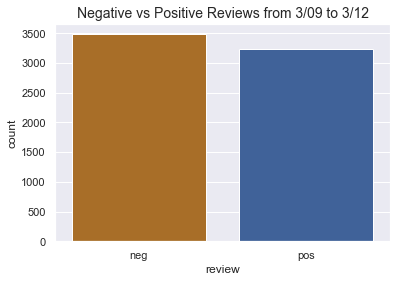

In [8]:
sns.countplot(x='review', data=df, palette=dict(pos="#315fa8", neg="#bd7013"))
plt.title('Negative vs Positive Reviews from 3/09 to 3/12',
         fontsize=14);

Let's explore the proportion of negative and positive comments by day.

In [9]:
df1 = df.copy()
df1['Date_created'] = pd.to_datetime(df['Date_created'])
df1.head()

,Date_created,Comment,review
0,2021-03-09 20:45:00,Cero000000. .periodista pésimo y títere de car...,neg
1,2021-03-09 20:45:00,Diez.,pos
2,2021-03-09 20:46:00,Diez,pos
3,2021-03-09 20:46:00,Cero,neg
4,2021-03-09 20:47:00,Diez,pos


In [10]:
day = df1['Date_created'].dt.day
day

0        9
1        9
2        9
3        9
4        9
        ..
6768    12
6769    12
6770    12
6771    12
6772    12
Name: Date_created, Length: 6722, dtype: int64

In [11]:
reviews_by_day = pd.DataFrame(columns = ['day', 'reviews'])
reviews_by_day

,day,reviews


In [12]:
reviews_by_day['day'] = np.array(day)
reviews_by_day['reviews'] = df1['review']

In [13]:
reviews_by_day.head()

,day,reviews
0,9,neg
1,9,pos
2,9,pos
3,9,neg
4,9,pos


In [14]:
day_9 = reviews_by_day[reviews_by_day['day'] == 9]
day_10 = reviews_by_day[reviews_by_day['day'] == 10]
day_11 = reviews_by_day[reviews_by_day['day'] == 11]
day_12 = reviews_by_day[reviews_by_day['day'] == 12]

In [15]:
day_9.head()

,day,reviews
0,9,neg
1,9,pos
2,9,pos
3,9,neg
4,9,pos


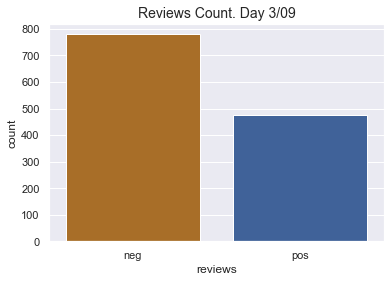

In [16]:
sns.countplot(x='reviews', data=day_9, palette=dict(pos="#315fa8", neg="#bd7013"))
plt.title('Reviews Count. Day 3/09', fontsize=14);

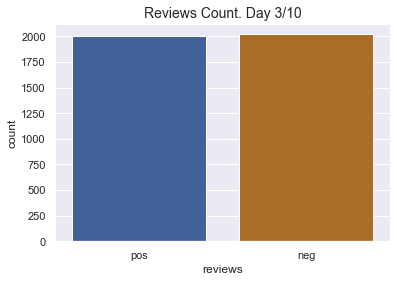

In [17]:
sns.countplot(x='reviews', data=day_10, palette=dict(pos="#315fa8", neg="#bd7013"))
plt.title('Reviews Count. Day 3/10', fontsize=14);

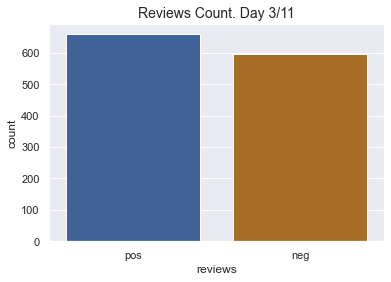

In [18]:
sns.countplot(x='reviews', data=day_11, palette=dict(pos="#315fa8", neg="#bd7013"))
plt.title('Reviews Count. Day 3/11', fontsize=14);

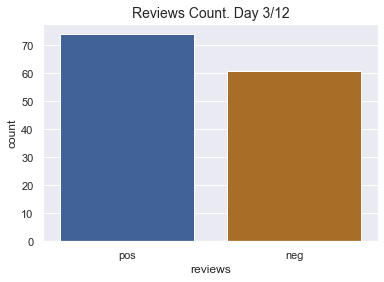

In [19]:
sns.countplot(x='reviews', data=day_12, palette=dict(pos="#315fa8", neg="#bd7013"))
plt.title('Reviews Count. Day 3/12', fontsize=14);

Although negative reviews are still majority (3483 vs 3239), positive reviews about the journalist's TV sections increased since 3/10.

Let's use then ML to check if our criteria to classify comments in positive or negative taking into account certain keywords was valid.

In [20]:
import preprocess_kgptalkie as ps # module installed from https://github.com/laxmimerit/preprocess_kgptalkie.git
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Let's use the module installed from the above mentioned github repo (whose author I highly recommend for those interested in ML), to clean our data (removing special caracters, urls, html tags etc. present in some comments).

In [21]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [22]:
df['Comment'] = df['Comment'].apply(lambda x: get_clean(x))

Let's check our comments after being cleaned.

In [23]:
df.head(20)

,Date_created,Comment,review
0,2021-03-09 20:45,cero0 periodista pesimo y titere de carton tip...,neg
1,2021-03-09 20:45,diez,pos
2,2021-03-09 20:46,diez,pos
3,2021-03-09 20:46,cero,neg
4,2021-03-09 20:47,diez,pos
5,2021-03-09 20:48,debe tener sus modificaciones pero es necesaria,pos
6,2021-03-09 20:48,diez,pos
7,2021-03-09 20:50,pesima,neg
8,2021-03-09 20:50,se pude dar cero en serio,neg
9,2021-03-09 20:50,cero,neg


In [24]:
tfidf = TfidfVectorizer(max_features=5000)
X = df['Comment']
y = df['review']

X = tfidf.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
accuracy = clf.score(X_test, y_test)
print(round(accuracy, 2)*100)

89.0


## Data Science experts agree that 80%-85% accuracy is a good score in Sentiment Analysis.

So maybe our "specific keywords found in some comments" criteria to classify those comments was a valid one.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.92      0.86      0.89       728
         pos       0.85      0.92      0.88       617

    accuracy                           0.89      1345
   macro avg       0.89      0.89      0.89      1345
weighted avg       0.89      0.89      0.89      1345



Let's compare predicted with actual results.

In [30]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)

cm.columns = ['Predicted as Negative', 'Predicted as Positive', 'Total']
cm = cm.set_index([['Actual Negative', 'Actual Positive', 'Total']])

print(cm)

                 Predicted as Negative  Predicted as Positive  Total
Actual Negative                    629                     99    728
Actual Positive                     52                    565    617
Total                              681                    664   1345


## Predicting real examples.

In [31]:
def comment_review():
    # From 1 to 10 how do you evaluate HL's TV section?
    coment = input('En escala del 1 al 10 cómo evalúas la sección del periodista HL?') # as posted in FB
    coment = get_clean(coment)
    vec = tfidf.transform([coment])
    if clf.predict(vec)[0] == 'neg':
        print('Review: Negative')
    else:
        print('Review: Positive')

In [34]:
# From 1 to 10 how do you evaluate HL's TV section?
# Our comment: I don't like it. It is all about lies and manipulation.

comment_review() 

En escala del 1 al 10 cómo evalúas la sección del periodista HL? Comment: No me gusta. Todo es mentira y manipulación.


Review: Negative


In [33]:
# From 1 to 10 how do you evaluate HL's TV section?
# Our comment: He is very professional. His TV space should go on.

comment_review() 

En escala del 1 al 10 cómo evalúas la sección del periodista HL? Comment: Es muy profesional. Debería continuar.


Review: Positive


In [35]:
# From 1 to 10 how do you evaluate HL's TV section?
# Our comment: I would give him ten points.

comment_review()

En escala del 1 al 10 cómo evalúas la sección del periodista HL? Comment: Le daría diez puntos.


Review: Positive


In [36]:
# From 1 to 10 how do you evaluate HL's TV section?
# Our comment: I would evaluate him with negative numbers. Under Zero!!!

comment_review()

En escala del 1 al 10 cómo evalúas la sección del periodista HL? Comment: Le daría números negativos. Cero!!!


Review: Negative


## With those examples we finished our Facebook Sentiment Analysis. Thanks for your reading.